In [564]:
%run -i mlutils.py
%matplotlib inline


In [292]:
from sklearn.datasets import make_moons, make_blobs
from sklearn.neighbors import KNeighborsClassifier

In [419]:
def plot_estimated_bayesian_boundaries(data_generation_function, estimator, dots_alpha=.5, n_reps=10, **kwargs):
    scores = []
    for i in range(n_reps):
        X,y = data_generation_function(**kwargs)
        estimator.fit(X,y)
        if i==0:
            plot_2Ddata_with_boundary(estimator.predict, X, y, dots_alpha=dots_alpha,
                                      line_width=2, line_alpha=1., line_color="darkgreen")
        else:
            plot_2D_boundary(estimator.predict, X.min(axis=0), X.max(axis=1), line_width=1, line_alpha=.5)
        scores.append(estimator.score(X,y))
    return scores

In [416]:
def plot_estimated_bayesian_boundaries_set(data_generation_function, estimator, 
                                           n_reps=10, data_generation_args_sets=[],
                                           dots_alpha=.5):
    plt.figure(figsize=(5*len(data_generation_args_sets),3))
    for i in range(len(data_generation_args_sets)):
        plt.subplot(1, len(data_generation_args_sets), i+1)
        scores = plot_estimated_bayesian_boundaries(data_generation_function,  
                                                    estimator,dots_alpha=dots_alpha,
                                                    n_reps=n_reps, **data_generation_args_sets[i])
        plt.title(str(data_generation_args_sets[i]))
        plt.xticks([])
        plt.yticks([])
        plt.xlabel("score=%.2f"%np.mean(scores)+" +-%.4f"%np.std(scores))

In [732]:
def plot_train_test_experiments(estimator, data_generation_function, data_generation_args_set, 
                                train_size, n_samples ):
    plt.figure(figsize=(5*n_samples,6))
    for i in range(n_samples):

        X, y = data_generation_function(**data_generation_args_set)
        Xtr, Xts, ytr, yts = train_test_split(X,y, train_size=train_size)
        estimator.fit(Xtr,ytr)
        plt.subplot(2,n_samples,i+1)
        plot_2Ddata_with_boundary(estimator.predict, Xtr, ytr, dots_alpha=.5,
                                  line_width=1, line_alpha=1., line_color="darkgreen", noticks=True)
        plt.title("SAMPLE %d, TRAIN size %d, score %.2f"%(i+1, len(Xtr), estimator.score(Xtr,ytr)))
        plt.subplot(2,n_samples,i+n_samples+1)
        plot_2Ddata_with_boundary(estimator.predict, Xts, yts, dots_alpha=.5,
                                  line_width=1, line_alpha=1., line_color="darkgreen", noticks=True)
        plt.title("SAMPLE %d, TEST size %d, score %.2f"%(i+1, len(Xts), estimator.score(Xts,yts)))
  

## 1. Datasets 

We will use three versions of the same dataset, with increasing noise

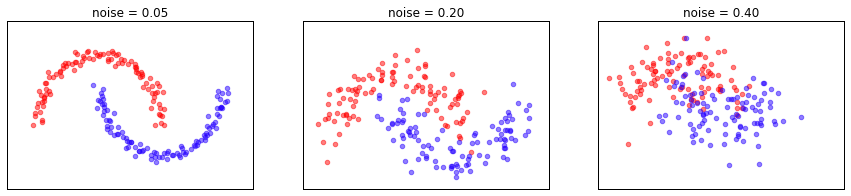

In [386]:
noises = [.05, .2, .4]
plt.figure(figsize=(15,3))
for i, noise in enumerate(noises):
    plt.subplot(1,3,i+1)
    X,y = make_moons(200, noise=noise)    
    plot_2Ddata(X,y)
    plt.xticks([]); plt.yticks([])
    plt.title("noise = %.2f"%noise)

## 2. Observe and understand bayesian boundaries

- Bayesian classification scores and frontiers are obtained **when we have access** to the distributions which generate our date (i.e. their probability density functions, PDF) 
- We **have access** to unlimited sampling of the data (see [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html))
- We **do not have access** to the PDF of distributions generating the data, thus, we approximate Bayes classification with [`KNeighboursClassification`](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), or with our own classifier based on [`KernelDensity`](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html) (which is computationally **much more** expensive, but yields cleaner classification frontiers)
- We sample 10 times datsets of different sizes and show classification boundaries and the accuracy score  obtained for each sample.

- **Only the points for the first sample** are shown (the frontier estimated with that sample is shown in green). The rest of the frontiers (in black) are estimated for **different** data samples.

Observe:

- we have three datasets of the same nature but with increasing noise. With noisier data, classes are more mixed and perfect classification becomes impossible even with full knowledge of the PDF generating the data $\rightarrow$ this is **Bayes classification score** (approximated with `KNeighboursClassification`)

- Bayes frontier and score are **always the same**, regardless dataset noise and number of samples, but since we use estimations for them, as we **increase data** estimated frontiers and scores become more stable.

- as **datasets are noisier**, more data is needed to get stable estimated frontiers and scores (see decreasing std in scores, as number of data increases).


In [383]:
data_generation_args_sets_5000 = [{"n_samples":5000, "noise":i} for i in noises]
data_generation_args_sets_500 = [{"n_samples":500, "noise":i} for i in noises]
data_generation_args_sets_50 = [{"n_samples":50, "noise":i} for i in noises]

**With KNeighbours**

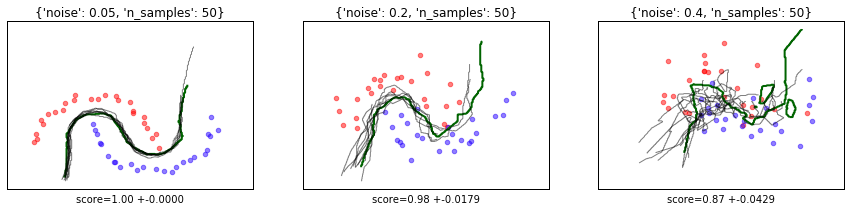

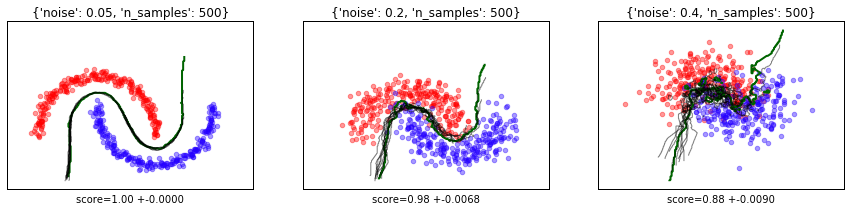

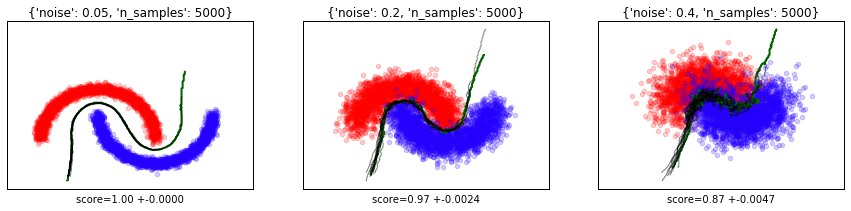

In [421]:
plot_estimated_bayesian_boundaries_set(
                     data_generation_function = make_moons, 
                     estimator=KNeighborsClassifier(n_neighbors=3), n_reps=10,
                     data_generation_args_sets= data_generation_args_sets_50)

plot_estimated_bayesian_boundaries_set(
                     data_generation_function = make_moons, 
                     estimator=KNeighborsClassifier(n_neighbors=5), n_reps=10,
                     data_generation_args_sets= data_generation_args_sets_500, dots_alpha=.4)

plot_estimated_bayesian_boundaries_set(
                     data_generation_function = make_moons, 
                     estimator=KNeighborsClassifier(n_neighbors=15), n_reps=10,
                     data_generation_args_sets= data_generation_args_sets_5000, dots_alpha=.2)

**With KernelDensity**

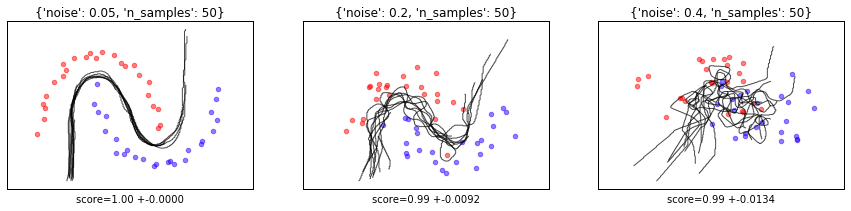

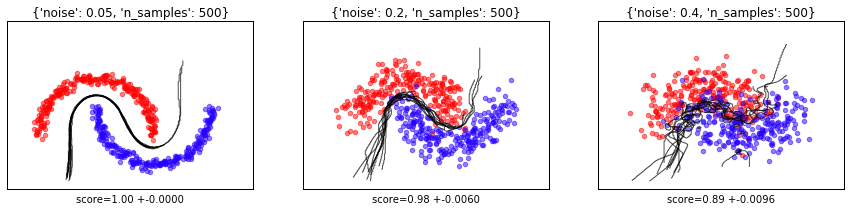

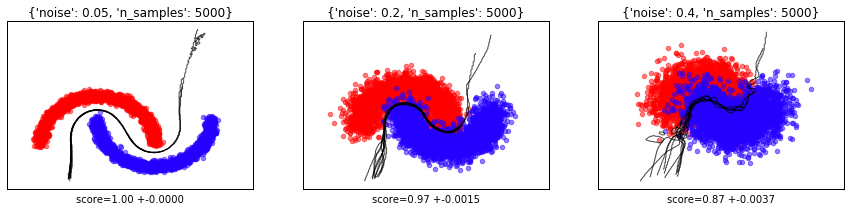

In [272]:
plot_estimated_bayesian_boundaries_set( data_generation_function = make_moons, 
                                        estimator=KDClassifier(bandwidth=.1), n_reps=10,
                                        data_generation_args_sets= data_generation_args_sets_50)

plot_estimated_bayesian_boundaries_set( data_generation_function = make_moons, 
                                        estimator=KDClassifier(bandwidth=.1), n_reps=10,
                                        data_generation_args_sets= data_generation_args_sets_500)

plot_estimated_bayesian_boundaries_set( data_generation_function = make_moons, 
                                        estimator=KDClassifier(bandwidth=.1), n_reps=10,
                                        data_generation_args_sets= data_generation_args_sets_5000)

## 3. Understand train and test sample sizes

**Each column** represents one experiment (sample) with the noisiest dataset:
- **TOP**: the classifier is fit with **TRAIN** data which is shown toegether with the classification frontier obtained
- **BOTTOM**: the previous classification frontier is shown (possibly zoomed out or scaled) together with **TEST** data

Observe:

- as we train with few examples the classification frontiers are adjusted to the variability of the train data.
- this produces **TEST SCORE** to be high and **TRAIN SCORE** to be low $\rightarrow$ overfitting


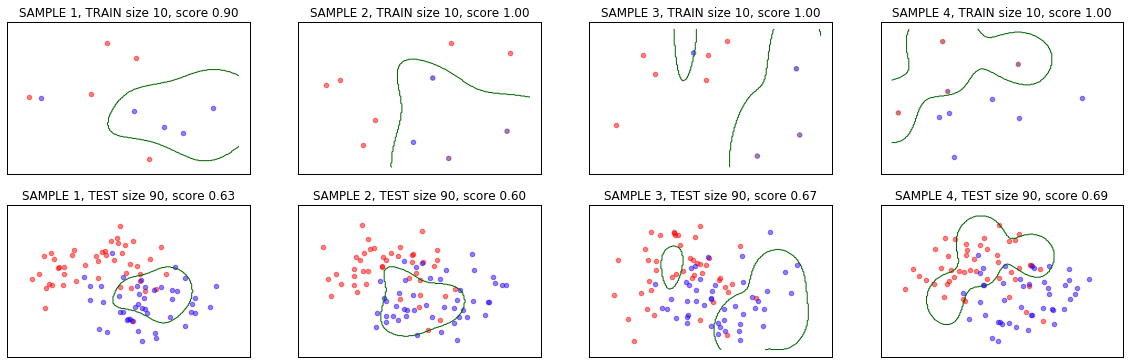

In [715]:
from sklearn.svm import SVC
kwargs = {"n_samples": 100, "noise": .4}
plot_train_test_experiments(SVC(gamma=5), make_moons, kwargs, train_size=.1, n_samples=4 )

now we use **more data for train**

- **TRAIN SCORE** descends and **TEST SCORE** augments

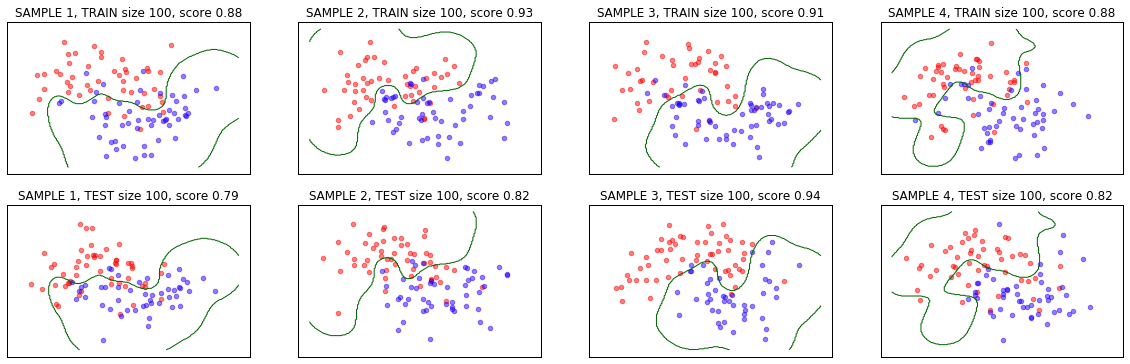

In [717]:
kwargs = {"n_samples": 200, "noise": .4}
plot_train_test_experiments(SVC(gamma=5), make_moons, kwargs, train_size=.5, n_samples=4 )

and **even more data**

- classification frontiers are more stable
- scores in train and test are very similar

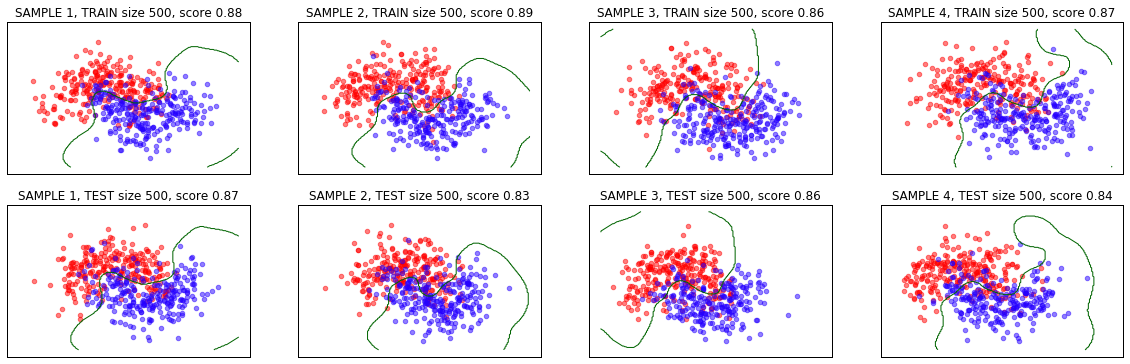

In [718]:
kwargs = {"n_samples": 1000, "noise": .4}
plot_train_test_experiments(SVC(gamma=5), make_moons, kwargs, train_size=.5, n_samples=4 )

this can be summarize in a **LEARNING CURVE**

In [688]:
%run -i mlutils.py

def compare_lcurves(estimator, data_generation_function, dataset1_kwargs, dataset2_kwargs):
    plt.figure(figsize=(15,4))
    plt.subplot(121)
    X,y = data_generation_function(**dataset1_kwargs)
    lcurve(estimator, X, y, n_reps=20, score_func=accuracy)
    plt.ylim(.5,1.05)
    plt.title("DATASET with %d points"%dataset1_kwargs["n_samples"])
    plt.subplot(122)
    X,y = data_generation_function(**dataset2_kwargs)
    lcurve(estimator, X, y, n_reps=20, score_func=accuracy)
    plt.title("DATASET with %d points"%dataset2_kwargs["n_samples"])
    plt.ylim(.5,1.05)

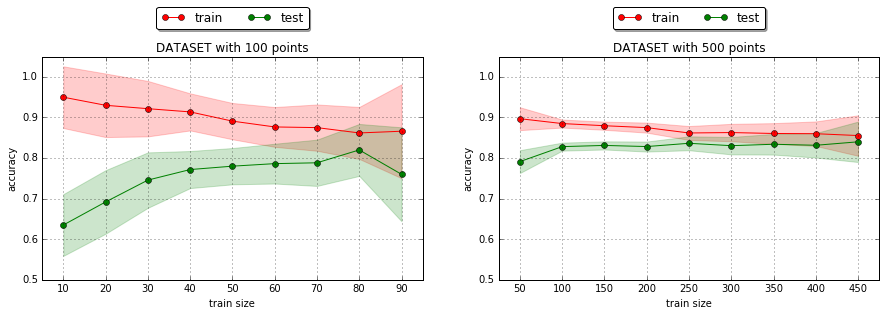

In [690]:
estimator = SVC(gamma=5)
data_generation_function = make_moons
dataset1_kwargs = {"n_samples": 100, "noise": .4}
dataset2_kwargs = {"n_samples": 500, "noise": .4}

compare_lcurves(estimator, make_moons, dataset1_kwargs, dataset2_kwargs)

## 4. Understanding  Learning Curves

Normally, we **CANNOT VISUALIZE** experiments such as above. We have **ONLY LEARNING CURVES** to diagnose the situation

### 4.1 Separable data

Let's now try with a less noisy dataset which is **SEPARABLE**. 

An SVC **captures well the classification frontier**

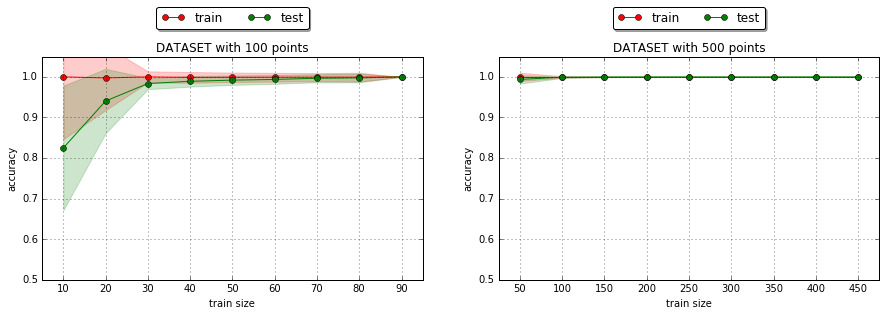

In [728]:
%run -i mlutils.py
estimator = SVC(gamma=5)
data_generation_function = make_moons
dataset1_kwargs = {"n_samples": 100, "noise": .1}
dataset2_kwargs = {"n_samples": 500, "noise": .1}

compare_lcurves(estimator, make_moons, dataset1_kwargs, dataset2_kwargs)

and some experiments at train_size=10 and at train_size=100

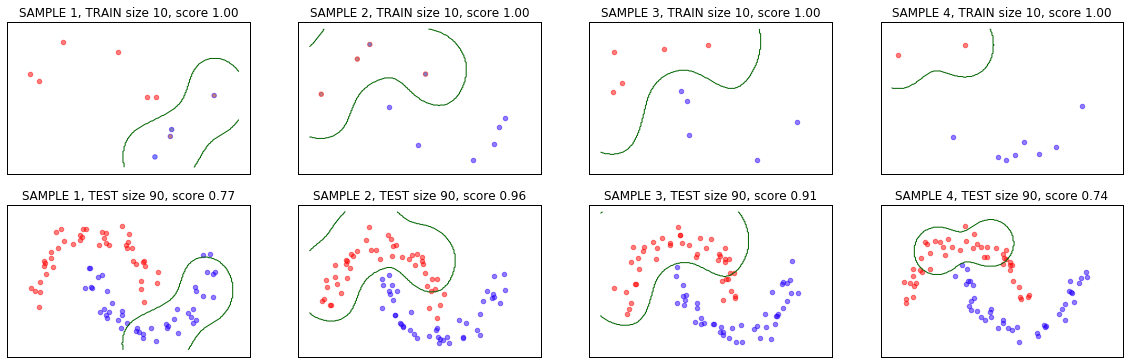

In [725]:
kwargs = {"n_samples": 100, "noise": .1}
plot_train_test_experiments(SVC(gamma=5), make_moons, kwargs, train_size=.1, n_samples=4 )

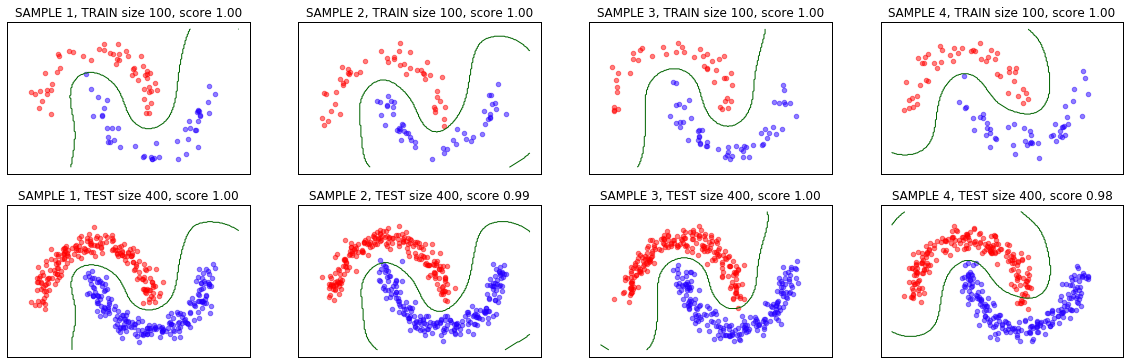

In [730]:
kwargs = {"n_samples": 500, "noise": .1}
plot_train_test_experiments(SVC(gamma=5), make_moons, kwargs, train_size=.2, n_samples=4 )

Observe now when we use a classifier which is **UNABLE TO CAPTURE THE CLASSIFICATION FRONTIER $\rightarrow$ BIAS**

- again, regardless the bias, with less data the frontier is **LESS STABLE**

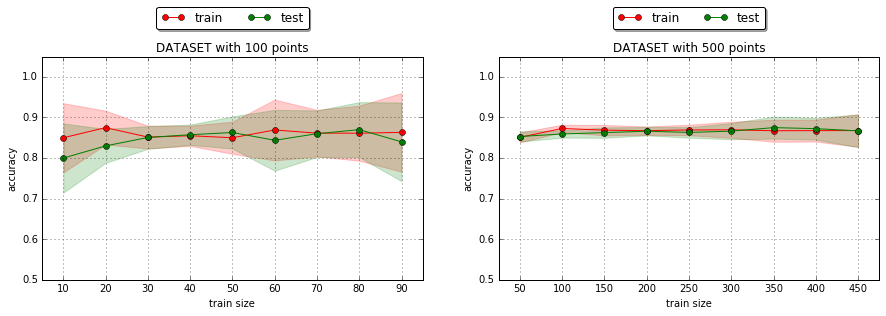

In [740]:
dataset1_kwargs = {"n_samples": 100, "noise": .1}
dataset2_kwargs = {"n_samples": 500, "noise": .1}
compare_lcurves(LogisticRegression(), make_moons, dataset1_kwargs, dataset2_kwargs)

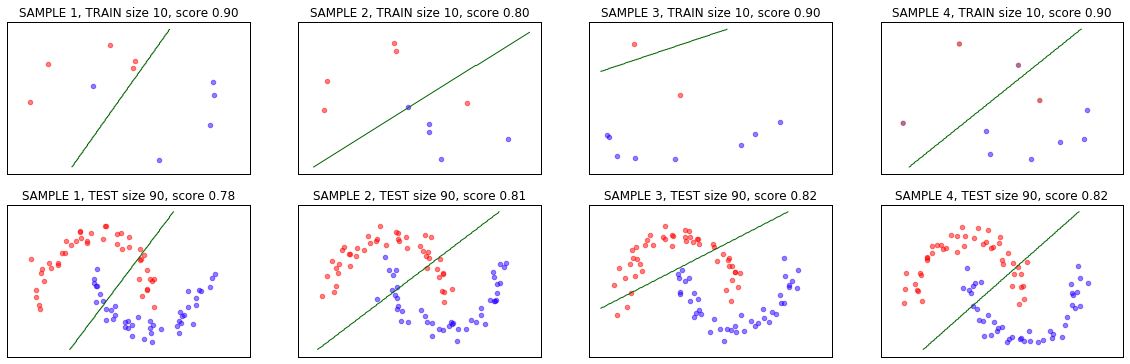

In [734]:
kwargs = {"n_samples": 100, "noise": .1}
plot_train_test_experiments(LogisticRegression(), make_moons, kwargs, train_size=.1, n_samples=4 )

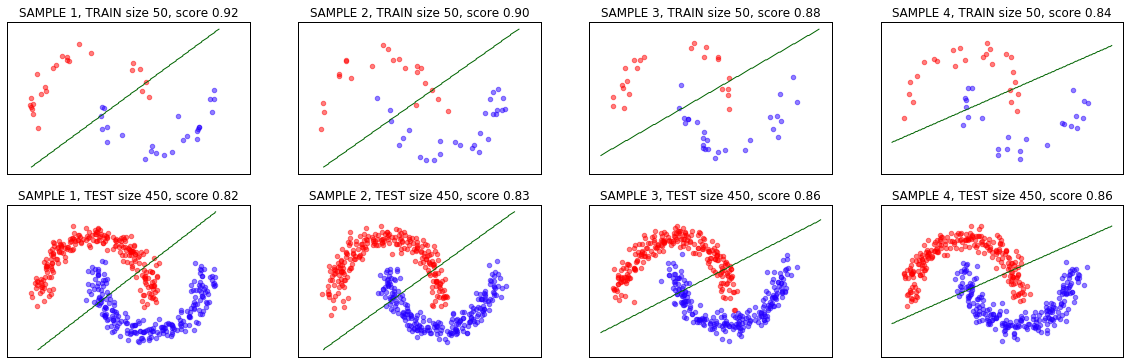

In [739]:
kwargs = {"n_samples": 500, "noise": .1}
plot_train_test_experiments(LogisticRegression(), make_moons, kwargs, train_size=.1, n_samples=4 )

this is an example of a classifier which takes more data to converge to the bayes frontier.

the left curve is an example of a case with **VARIANCE** (gap between train and test)

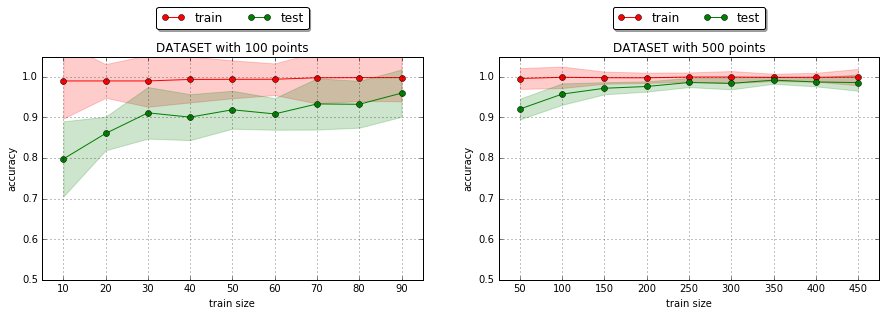

In [741]:
dataset1_kwargs = {"n_samples": 100, "noise": .1}
dataset2_kwargs = {"n_samples": 500, "noise": .1}
compare_lcurves(RandomForestClassifier(), make_moons, dataset1_kwargs, dataset2_kwargs)

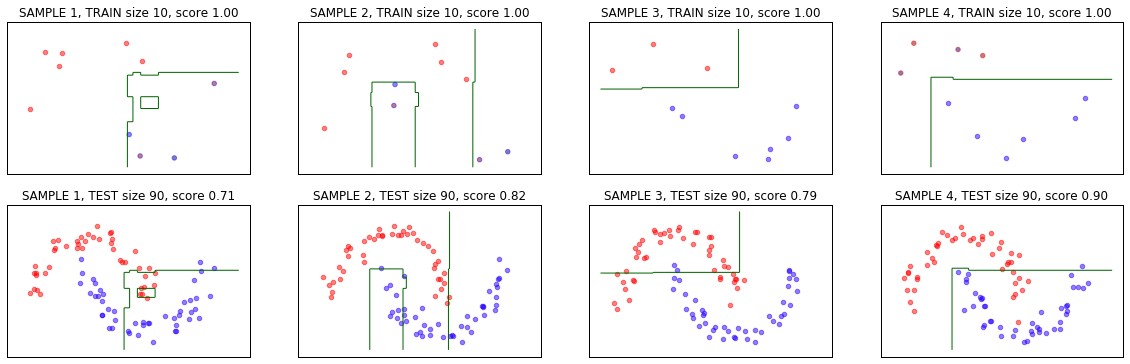

In [742]:
kwargs = {"n_samples": 100, "noise": .1}
plot_train_test_experiments(RandomForestClassifier(), make_moons, kwargs, train_size=.1, n_samples=4 )

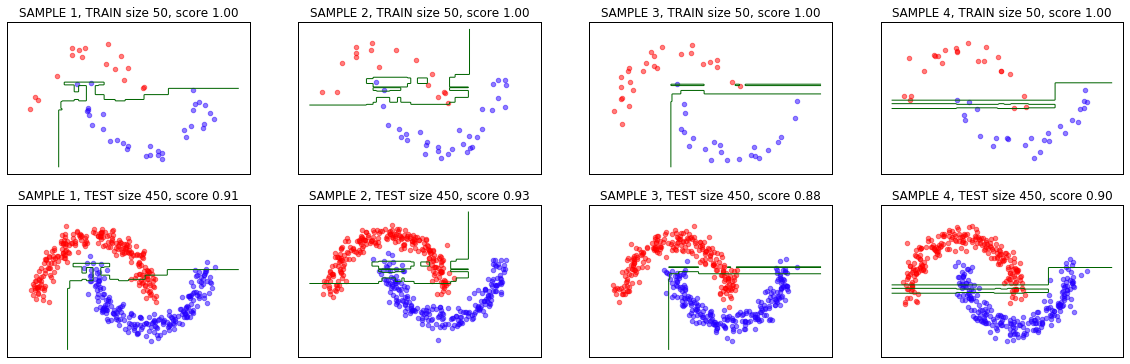

In [749]:
kwargs = {"n_samples": 500, "noise": .1}
plot_train_test_experiments(RandomForestClassifier(), make_moons, kwargs, train_size=.1, n_samples=4 )

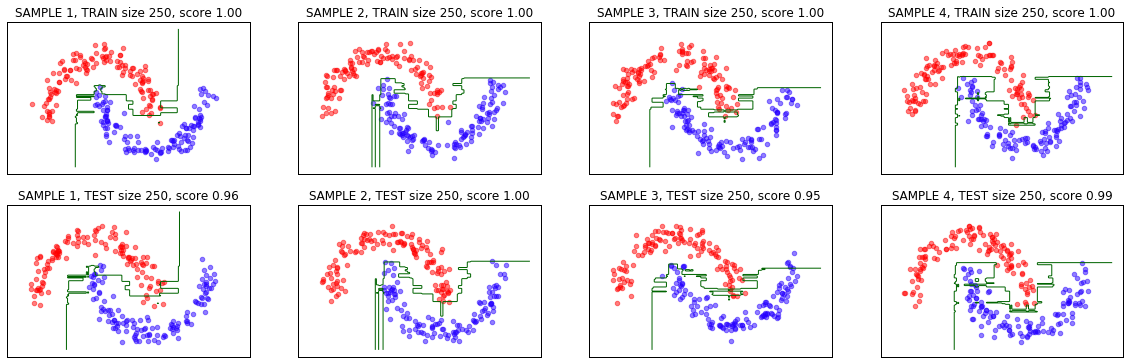

In [748]:
kwargs = {"n_samples": 500, "noise": .1}
plot_train_test_experiments(RandomForestClassifier(), make_moons, kwargs, train_size=.5, n_samples=4 )

### 4.2 Non-separable data

we use a noisier version of the dataset to gain some insight.

observe how

- we **are privileged** and know that the bayes score should be about .87

- **SVC** approximates bayes score but needs more data. It captures the bayes frontier but  presents **BIAS** due to the non separable nature of the data.
- **LogisticRegression** does not capture the nature of the bayes frontier regardless how much data
- **RandomForests** has the capability to model any frontier, but **overfits** the data and ends up underscoring bayes similarly to LogisticRegression 

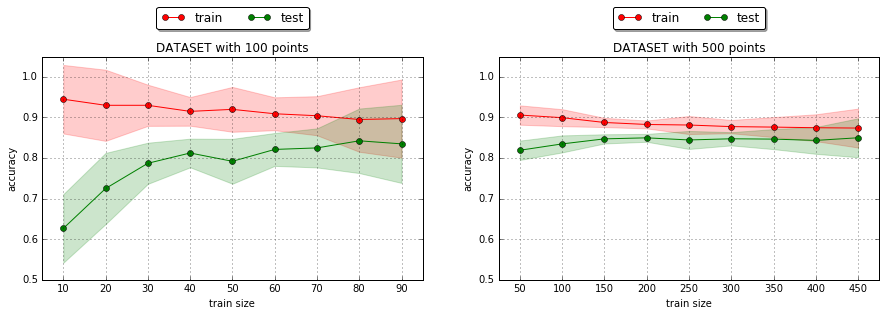

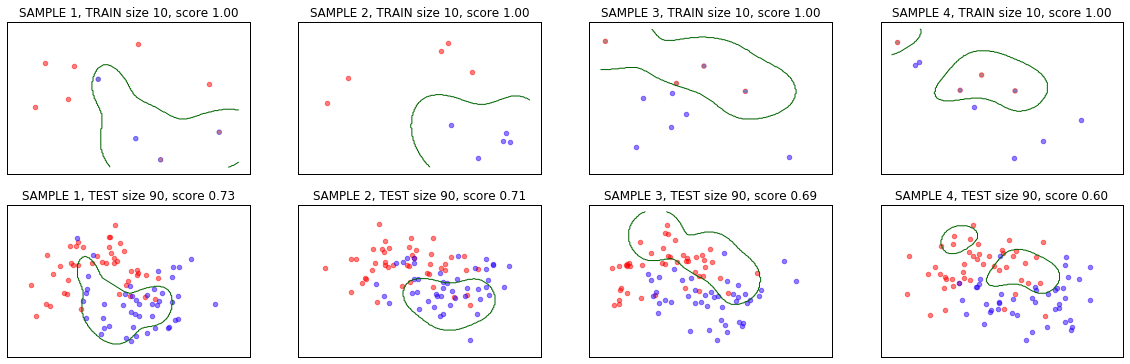

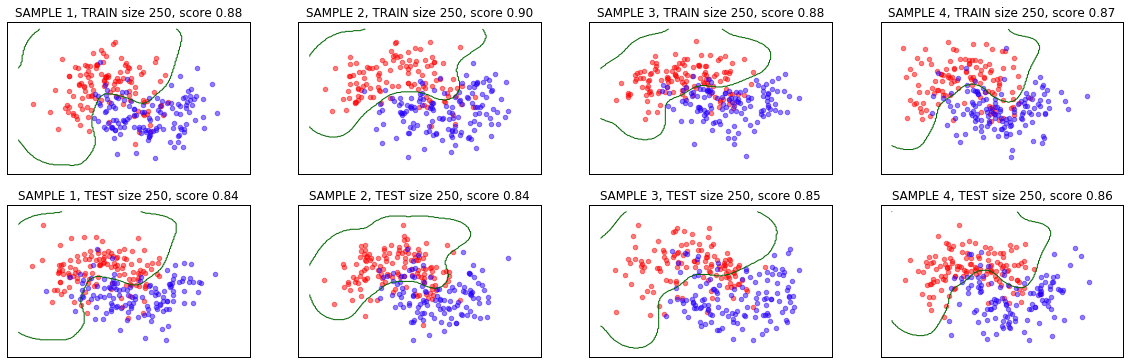

In [760]:
estimator = SVC(gamma=5)
data_generation_function = make_moons
dataset1_kwargs = {"n_samples": 100, "noise": .4}
dataset2_kwargs = {"n_samples": 500, "noise": .4}

compare_lcurves(estimator, make_moons, dataset1_kwargs, dataset2_kwargs)

kwargs = {"n_samples": 100, "noise": .4}
plot_train_test_experiments(estimator, make_moons, kwargs, train_size=.1, n_samples=4 )

kwargs = {"n_samples": 500, "noise": .4}
plot_train_test_experiments(estimator, make_moons, kwargs, train_size=.5, n_samples=4 )

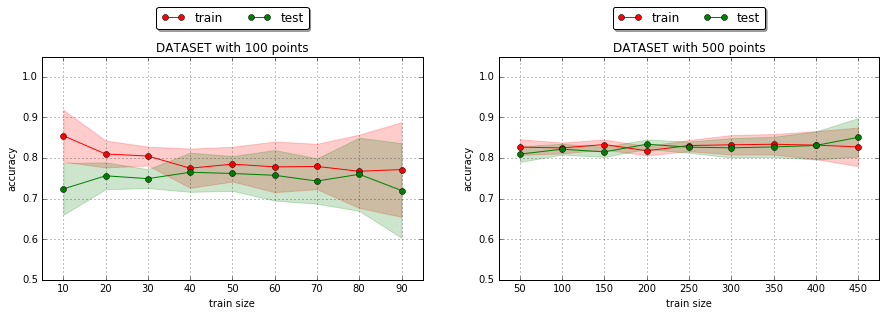

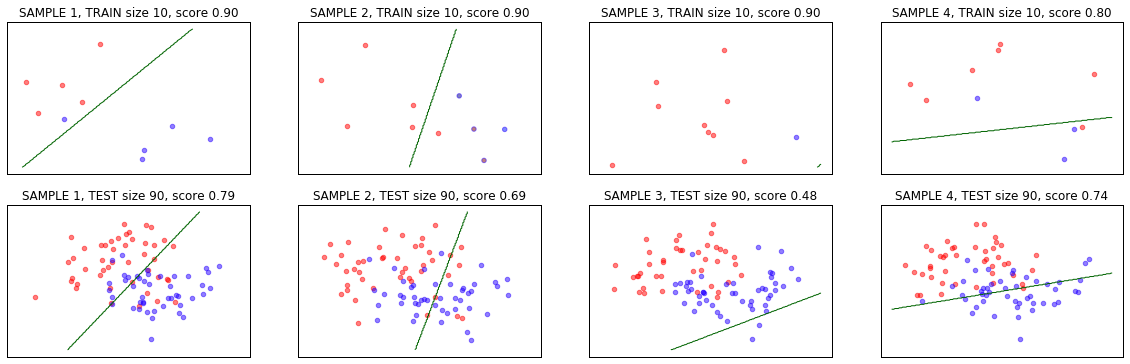

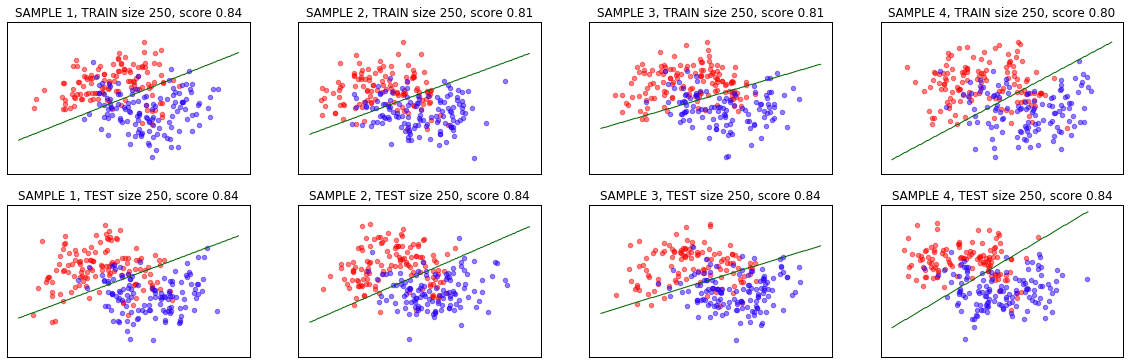

In [759]:
estimator = LogisticRegression()
data_generation_function = make_moons
dataset1_kwargs = {"n_samples": 100, "noise": .4}
dataset2_kwargs = {"n_samples": 500, "noise": .4}

compare_lcurves(estimator, make_moons, dataset1_kwargs, dataset2_kwargs)

kwargs = {"n_samples": 100, "noise": .4}
plot_train_test_experiments(estimator, make_moons, kwargs, train_size=.1, n_samples=4 )

kwargs = {"n_samples": 500, "noise": .4}
plot_train_test_experiments(estimator, make_moons, kwargs, train_size=.5, n_samples=4 )

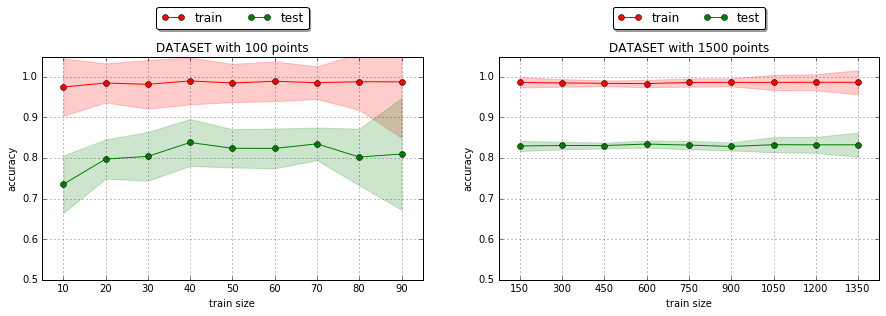

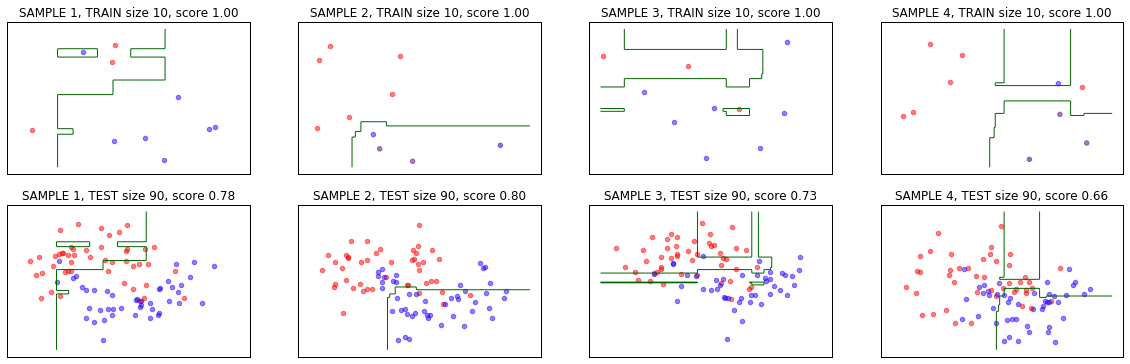

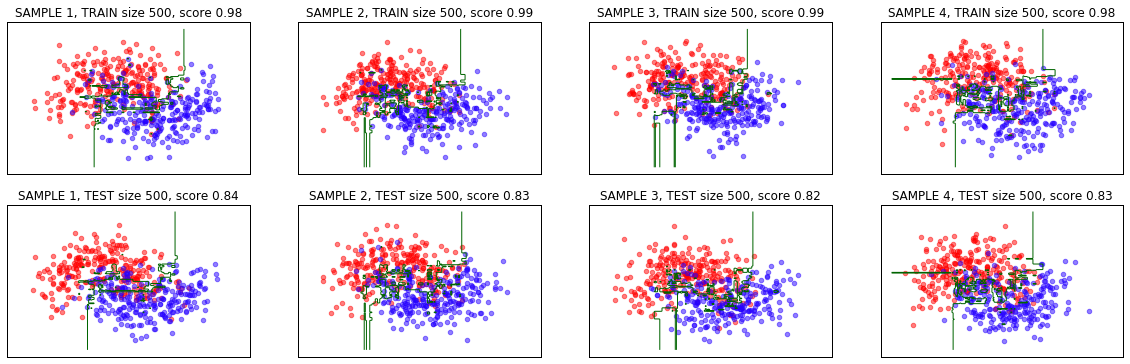

In [773]:
estimator = RandomForestClassifier()
data_generation_function = make_moons
dataset1_kwargs = {"n_samples": 100, "noise": .4}
dataset2_kwargs = {"n_samples": 1500, "noise": .4}

compare_lcurves(estimator, make_moons, dataset1_kwargs, dataset2_kwargs)

kwargs = {"n_samples": 100, "noise": .4}
plot_train_test_experiments(estimator, make_moons, kwargs, train_size=.1, n_samples=4 )

kwargs = {"n_samples": 1000, "noise": .4}
plot_train_test_experiments(estimator, make_moons, kwargs, train_size=.5, n_samples=4 )

when we have high variance:
    
- we might not have enough data to be representative from the full population, even if our problem is separable.
- the algorithm needs more data to capture the bayes frontier, even if our proble is separable.
- the data might not be separable.

when we have high bias:

- the data might not be separable.
- our algorithm is not able to capture well the bayes frontier, regardless the amount of data.

## 5. Diagnosing learning curves

observe the following two curves

- **LEFT**: noisy dataset 



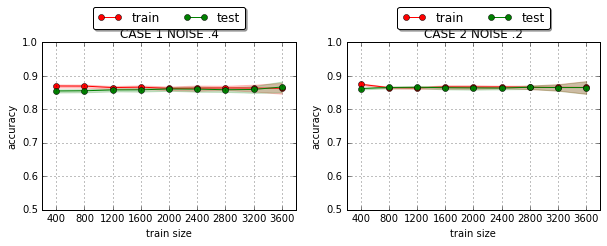

In [792]:
plt.figure(figsize=(10,3))
plt.subplot(121)
X,y = make_moons(n_samples = 4000, noise= .4)
lcurve(SVC(gamma=5), X, y, n_reps=20, score_func=accuracy)
plt.ylim(.5,1)
plt.title("CASE 1 NOISE .4")
plt.subplot(122)
X,y = make_moons(n_samples = 4000, noise= .2)
lcurve(LogisticRegression(), X, y, n_reps=20, score_func=accuracy)
plt.ylim(.5,1)
plt.title("CASE 2 NOISE .2 LOGREG")


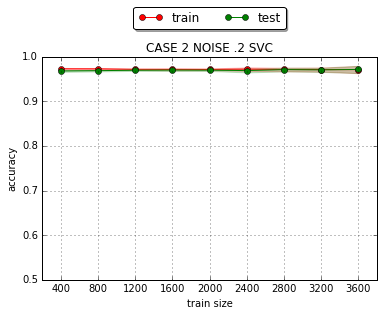

In [793]:
X,y = make_moons(n_samples = 4000, noise= .2)
lcurve(SVC(gamma=5), X, y, n_reps=20, score_func=accuracy)
plt.ylim(.5,1)
plt.title("CASE 2 NOISE .2 SVC")